<a href="https://colab.research.google.com/github/rakieciarz/ML_bootcamp_1/blob/main/regresja_liniowa2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

In [5]:
data, target = make_regression(n_samples=1000, n_features=1, n_targets=1, noise=15.0, random_state=42)
print(f'data shape: {data.shape}')
print(f"target shape: {target.shape}")

data shape: (1000, 1)
target shape: (1000,)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(data,target, test_size=0.25)

[]

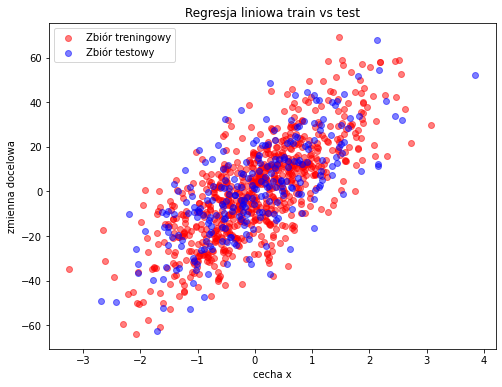

In [15]:
plt.figure(figsize=(8,6))
plt.title('Regresja liniowa train vs test')
plt.xlabel('cecha x')
plt.ylabel("zmienna docelowa")
plt.scatter(X_train, y_train,label='Zbiór treningowy', color='red',alpha=0.5)
plt.scatter(X_test, y_test,label='Zbiór testowy', color='blue',alpha=0.5)
plt.legend()
plt.plot()


In [16]:
regression = LinearRegression()
regression.fit(X_test, y_test)
print(regression.coef_)
print(regression.intercept_)
print(regression.score(X_train,y_train))

[15.64804097]
0.9666463535530563
0.5456102348490147


In [17]:
regression.score(X_test,y_test)

0.5260729241125929

[]

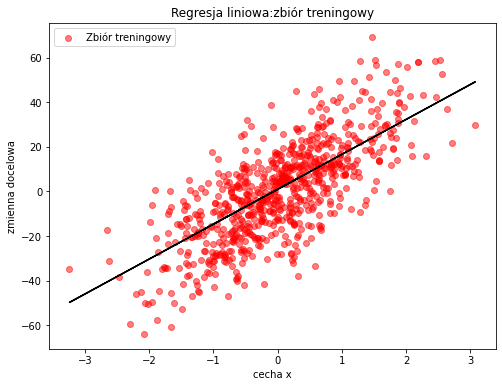

In [20]:
plt.figure(figsize=(8,6))
plt.title('Regresja liniowa:zbiór treningowy')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X_train, y_train, color='red', label='Zbiór treningowy', alpha=0.5)
plt.plot(X_train, regression.intercept_+regression.coef_[0]*X_train,color='black')
plt.legend()
plt.plot()

[]

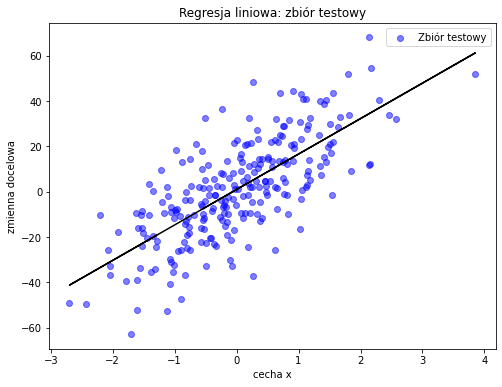

In [21]:
plt.figure(figsize=(8,6))
plt.title('Regresja liniowa: zbiór testowy')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X_test, y_test,label='Zbiór testowy', color='blue', alpha=0.5)
plt.plot(X_test, regression.intercept_+regression.coef_*X_test, color='black')
plt.legend()
plt.plot()

In [24]:
y_pred=regression.predict(X_test)
predictions = pd.DataFrame(data={'y_true':y_test,'y_pred':y_pred})
predictions.head()

,y_true,y_pred
0,-11.722476,-7.323063
1,1.917223,4.234952
2,4.582996,8.113939
3,-23.910528,-4.287726
4,29.604054,19.096397


In [25]:
predictions['error'] = predictions['y_true'] - predictions['y_pred']
predictions.head()

,y_true,y_pred,error
0,-11.722476,-7.323063,-4.399413
1,1.917223,4.234952,-2.317730
2,4.582996,8.113939,-3.530943
3,-23.910528,-4.287726,-19.622802
4,29.604054,19.096397,10.507657


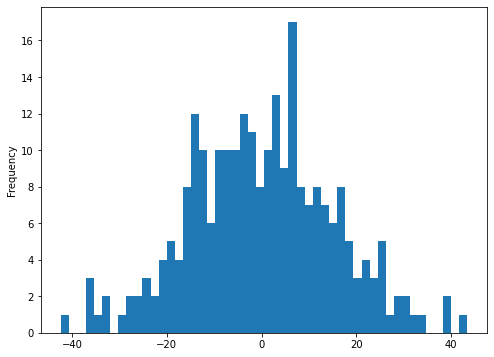

In [28]:
_ = predictions['error'].plot(kind='hist', bins=50, figsize=(8,6))